# Assignment 2: Non-Linear Classification with SVM

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia

In this assignment, you will implement your own version of SVM with kernels to classify non-linear data. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_svm.ipynb**.


## 1. DATA SET AND VISUALIZATION FUNCTION
We will use the non-linear toy data called the Moon dataset. You may use the code snippet below to generate the train/test set. Feel free to change the number of samples, and noise level. Additionally, a function plot_svm() is provided to help you visualize the decision boundary, margin, and support vectors on the dataset in 2D feature space.

In [0]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np

X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data
    
    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax] 
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 




- - -
## 2. TRAIN SVM FOR CLASSIFICATION TASK (20 pts)

Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) Gaussian RBF. For each kernel, you will need to report the following:

* Confusion matrix, Recall, and Precision. If applicable, discuss any tuning process on C and/or gamma to get to a reasonable result.
* Use the provided plot_svm() to visualize the SVM in 2D. This might give you some insight on how SVM determine the margin and support vector on the Moon dataset.



In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#Linear Model
#Fine tune by using GridSearchCV on to get bets parameter

tuned_parameters_linear = {'C': [0.1, 1, 10]}
linear_kernel_svm_clf = SVC(kernel='linear', random_state=42)
linear_search = GridSearchCV(linear_kernel_svm_clf, tuned_parameters_linear, cv=5,
                       scoring="accuracy")
linear_search.fit(X_train, y_train)
linear_search.best_params_

{'C': 10}

[[34 11]
 [ 5 50]]
0.819672131147541
0.9090909090909091


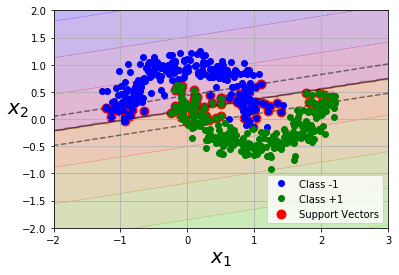

In [0]:
linear_kernel_svm_clf = SVC(kernel='linear', coef0=1, C=10, random_state=42)
linear_kernel_svm_clf.fit(X_train, y_train)
y_pred_linear = linear_kernel_svm_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_linear))
print(precision_score(y_test, y_pred_linear))
print(recall_score(y_test, y_pred_linear))
plot_svm(linear_kernel_svm_clf, X, y, axes=[-2, 3, -2, 2])


In [0]:
#Polynomial Model
#Fine tune by using GridSearchCV on to get bets parameter
tuned_parameters_poly = {'C': [0.1, 1, 100],
                        'gamma': [0.5, 1, 5]}
poly_kernel_svm_clf = SVC(kernel='poly', degree = 3, random_state=42)
poly_search = GridSearchCV(poly_kernel_svm_clf, tuned_parameters_poly, cv=5,
                       scoring="accuracy")
poly_search.fit(X_train, y_train)
poly_search.best_params_

{'C': 0.1, 'gamma': 1}

[[42  3]
 [ 0 55]]
0.9482758620689655
1.0


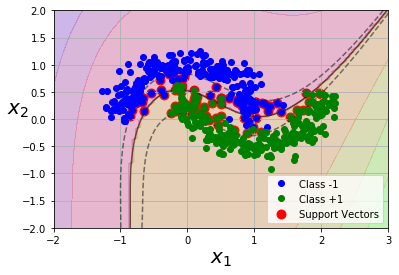

In [0]:
poly_kernel_svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=0.1, gamma=1, random_state=42)
poly_kernel_svm_clf.fit(X_train, y_train)
y_pred_poly = poly_kernel_svm_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_poly))
print(precision_score(y_test, y_pred_poly))
print(recall_score(y_test, y_pred_poly))
plot_svm(poly_kernel_svm_clf, X, y, axes=[-2, 3, -2, 2])

In [0]:
#RBF Model
#Fine tune by using GridSearchCV on to get bets parameter
tuned_parameters_rbf = {'C': [0.1, 1, 100],
                        'gamma': [0.5, 1, 5]}
rbf_kernel_svm_clf = SVC(kernel='rbf', degree = 3, random_state=42)
rbf_search = GridSearchCV(rbf_kernel_svm_clf, tuned_parameters_rbf, cv=5,
                       scoring="accuracy")
rbf_search.fit(X_train, y_train)
rbf_search.best_params_

{'C': 1, 'gamma': 5}

[[42  3]
 [ 0 55]]
0.9482758620689655
1.0


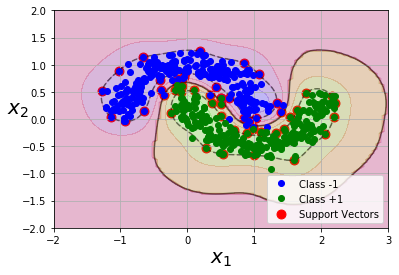

In [0]:
rbf_kernel_svm_clf = SVC(kernel='rbf', coef0=1, C=1, gamma=5, random_state=42)
rbf_kernel_svm_clf.fit(X_train, y_train)
y_pred_rbf = rbf_kernel_svm_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rbf))
print(precision_score(y_test, y_pred_rbf))
print(recall_score(y_test, y_pred_rbf))
plot_svm(rbf_kernel_svm_clf, X, y, axes=[-2, 3, -2, 2])

## 3. IMPLEMENT YOUR OWN NON-LINEAR SVM (60 pts)
Now that you see how the standard library SVM perform on the dataset, you will attempt to implement your own version of SVM. To help you, a template of SVM has been created including the quadratic optimization. Essensially, you will get the optimized value of $\alpha$ for free. Note that there are **6 subtasks** which you need to implement in order to get the SVM to work properly.

In [0]:
# Use the information from the lecture slides to formulate the SVM Kernels. 
# To help you get started, the Linear Kernel (simply just a dot product) has been provided to you. 
# These kernel functions will be called in the SVM class
# Linear Kernel             
def linear_kernel(u, v):
    return np.dot(u, v)

# Polynomial Kernel
def polynomial_kernel(u, v, p=3):
    # SUBTASK 1 (5 pts): Implement the kernel formulation here
    return (1 + np.dot(u, v)) ** p

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=0.1):
    # SUBTASK 2 (5 pts): Implement the kernel formulation here
    return np.exp(-gamma*np.linalg.norm(u-v)**2)

In [0]:
import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin

class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        
        m_samples, n_features = X.shape

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])
        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-3
        
        # SUBTASK 3 (5 pts): Find the support vectors
        self.support_vectors_ = X[sv]
        self.a= a[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (sum(sv), m_samples))
        print(self.a)
        # SUBTASK 4 (10 pts): Compute the Intercept b
        self.b = 0
        for i in range(len(self.support_vectors_)):
            self.b = self.b + self.sv_y[i] - np.sum(self.a * self.sv_y * K[np.arange(len(a))[sv][i],sv])
        self.b = self.b / len(self.support_vectors_)
        
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            # SUBTASK 5 (10 pts): Compute the Weight vector w
            for n in range(len(self.support_vectors_)):
                self.w = self.w + self.a[n] * self.sv_y[n] * self.support_vectors_[n]
        else:
            # No need to compute for w in non-linear case
            # Instead, we will use alpha (a) directly to predict the labels
            self.w =  None

    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            # SUBTASK 6 (25 pts): for non-linear case, implement the kernel trick to predict label here
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                y = 0
                for n in range(len(self.a)):
                    y = y + self.a[n] * self.sv_y[n] * self.kernel(self.support_vectors_[n], X[i])
                y_predict[i] = y
            return y_predict + self.b
    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))



---
## 4. COMPARE YOUR IMPLEMENTATION TO THE STANDARD LIBRARY (20 pts)
Now that you have implemented your own SVM class, let's use it! Create 3 instances of your SVM class, each with a difference kernel (Linear, Polynomial, and RBF kernel), then train and test its performance in the Moon dataset as above. Report the same metrics (confusion matrix, recall, and precision). You can use the plot_svm() function to visualize your SVM with decision boundary, margin, and support vectors on the dataset.

Based on the number above, compare your SVM implementation with the standard library version. How did your SVM perform in comparison? Is there any major differences between the algorithms? Finally, reflecting on your experience implementing a learning algorithm for this assignment.

     pcost       dcost       gap    pres   dres
 0: -1.4825e+03 -5.1278e+05  1e+06  5e-01  2e-13
 1:  6.3337e+02 -8.4152e+04  9e+04  3e-03  2e-13
 2: -3.1178e+03 -1.3716e+04  1e+04  3e-04  1e-13
 3: -3.9801e+03 -7.2962e+03  3e+03  8e-05  2e-13
 4: -4.3040e+03 -6.7243e+03  2e+03  5e-05  1e-13
 5: -4.5632e+03 -6.1443e+03  2e+03  3e-05  1e-13
 6: -4.7474e+03 -5.8273e+03  1e+03  2e-05  2e-13
 7: -4.8818e+03 -5.5526e+03  7e+02  9e-06  2e-13
 8: -4.9803e+03 -5.4037e+03  4e+02  5e-06  2e-13
 9: -5.0305e+03 -5.3214e+03  3e+02  3e-06  2e-13
10: -5.0695e+03 -5.2532e+03  2e+02  2e-06  2e-13
11: -5.1016e+03 -5.1999e+03  1e+02  5e-07  2e-13
12: -5.1224e+03 -5.1709e+03  5e+01  2e-07  2e-13
13: -5.1393e+03 -5.1497e+03  1e+01  3e-13  2e-13
14: -5.1440e+03 -5.1449e+03  8e-01  4e-14  3e-13
15: -5.1444e+03 -5.1444e+03  9e-03  6e-14  3e-13
16: -5.1444e+03 -5.1444e+03  9e-05  2e-13  3e-13
Optimal solution found.
104 support vectors out of 400 points
[49.9999999  49.99999994 49.99999992 49.99999995 49.99999

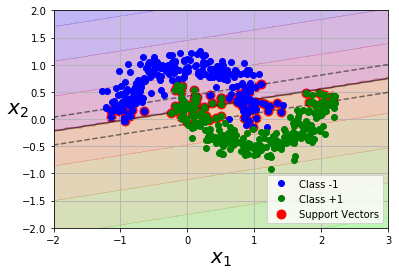

In [23]:
# Your code here
own_linear_clf = MySVM(C=50);
own_linear_clf.fit(X_train, y_train)
y_predict_own_linear = own_linear_clf.predict(X_test)
print(confusion_matrix(y_test, y_predict_own_linear))
print(precision_score(y_test, y_predict_own_linear))
print(recall_score(y_test, y_predict_own_linear))
plot_svm(own_linear_clf, X, y, axes=[-2, 3, -2, 2])

     pcost       dcost       gap    pres   dres
 0:  9.7663e+03 -2.9091e+06  8e+06  9e-01  4e-12
 1:  2.0674e+04 -1.1043e+06  2e+06  1e-01  3e-12
 2:  2.4384e+04 -1.9599e+05  3e+05  2e-02  2e-12
 3:  1.1188e+04 -4.9803e+04  7e+04  3e-03  2e-12
 4:  3.8045e+03 -1.9527e+04  2e+04  8e-04  6e-13
 5:  1.0086e+03 -6.8967e+03  8e+03  2e-04  4e-13
 6: -8.0601e+00 -3.0241e+03  3e+03  2e-05  4e-13
 7: -1.3558e+02 -2.9213e+03  3e+03  2e-05  4e-13
 8: -4.6339e+02 -1.7843e+03  1e+03  2e-06  5e-13
 9: -6.4546e+02 -1.4645e+03  8e+02  7e-07  5e-13
10: -7.8090e+02 -1.1398e+03  4e+02  3e-08  7e-13
11: -8.2961e+02 -1.0306e+03  2e+02  2e-09  7e-13
12: -8.4845e+02 -9.9865e+02  2e+02  1e-09  6e-13
13: -8.6834e+02 -9.6817e+02  1e+02  2e-10  6e-13
14: -8.9698e+02 -9.3062e+02  3e+01  7e-12  6e-13
15: -9.1059e+02 -9.1510e+02  5e+00  5e-13  7e-13
16: -9.1267e+02 -9.1278e+02  1e-01  3e-14  7e-13
17: -9.1273e+02 -9.1273e+02  2e-03  1e-13  6e-13
18: -9.1273e+02 -9.1273e+02  2e-05  8e-14  7e-13
Optimal solution foun

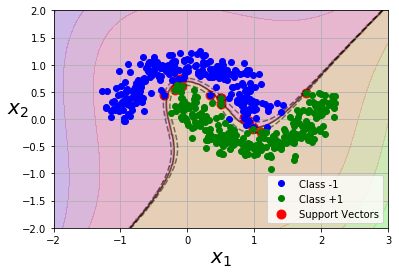

In [29]:
own_poly_clf = MySVM(polynomial_kernel, C=100);
own_poly_clf.fit(X_train, y_train)
y_predict_own_poly = own_poly_clf.predict(X_test)
print(confusion_matrix(y_test, y_predict_own_poly))
print(precision_score(y_test, y_predict_own_poly))
print(recall_score(y_test, y_predict_own_poly))
plot_svm(own_poly_clf, X, y, axes=[-2, 3, -2, 2])

     pcost       dcost       gap    pres   dres
 0:  4.6385e+04 -1.5796e+06  3e+06  3e-01  3e-13
 1:  3.4543e+04 -2.2873e+05  3e+05  2e-02  2e-13
 2:  4.8657e+03 -5.9196e+04  7e+04  3e-03  1e-13
 3: -1.0068e+03 -1.9509e+04  2e+04  6e-04  1e-13
 4: -2.2932e+03 -1.0952e+04  9e+03  3e-04  1e-13
 5: -2.5949e+03 -1.0536e+04  8e+03  2e-04  1e-13
 6: -3.1146e+03 -8.7122e+03  6e+03  1e-04  2e-13
 7: -3.4342e+03 -8.2139e+03  5e+03  7e-05  1e-13
 8: -3.7255e+03 -7.2673e+03  4e+03  4e-05  1e-13
 9: -3.9425e+03 -6.6019e+03  3e+03  3e-05  1e-13
10: -4.3279e+03 -5.5897e+03  1e+03  9e-06  2e-13
11: -4.4335e+03 -5.3830e+03  9e+02  5e-06  2e-13
12: -4.5439e+03 -5.2064e+03  7e+02  3e-06  2e-13
13: -4.6806e+03 -4.9589e+03  3e+02  4e-07  2e-13
14: -4.7353e+03 -4.8767e+03  1e+02  2e-07  2e-13
15: -4.7628e+03 -4.8261e+03  6e+01  5e-14  3e-13
16: -4.7861e+03 -4.8008e+03  1e+01  2e-14  3e-13
17: -4.7914e+03 -4.7949e+03  3e+00  2e-14  3e-13
18: -4.7930e+03 -4.7932e+03  2e-01  3e-13  3e-13
19: -4.7931e+03 -4.79

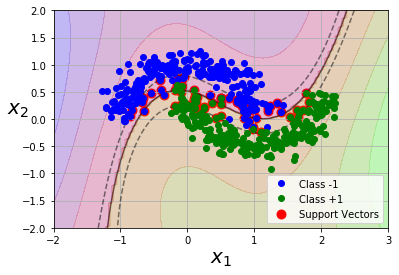

In [30]:
own_rbf_clf = MySVM(rbf_kernel, C=100);
own_rbf_clf.fit(X_train, y_train)
y_predict_own_rbf = own_rbf_clf.predict(X_test)
print(confusion_matrix(y_test, y_predict_own_rbf))
print(precision_score(y_test, y_predict_own_rbf))
print(recall_score(y_test, y_predict_own_rbf))
plot_svm(own_rbf_clf, X, y, axes=[-2, 3, -2, 2])

Some final thoughts:

*   
Comparing the results giving by my SVM and by standard library, my SVM performed as well as standard library, having the same confusion matrix, recall and precision.
*
As for the diffierence between the algorithms, there is no major difference but the standard library can take more parameters like sample_weight and class_weight.
*
Though the implementing process is difficult, the experience implementing the SVM algorithm is great and gives me chance to fully understand the theorem behind instead of just application. 




## Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Part of the codes used in this assignment is modified from Mathieu Blondel under the 3-Clause BSD License. Best of luck and have fun!